In [99]:
%config InlineBackend.figure_format = 'svg'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
data = [
    ["Baseline", "-", "-", "Baseline", 71.30, 0.06, 2.31, 52.14, 16.87, 17.99],
    ["BlockMoE 1st", "conv4_x", r"$\mathcal{L}_{ent}$", "Conv-GAP", 68.59, 0.00, 2.26, 48.69, 15.62, 17.56],
    ["BlockMoE 1st", "conv4_x", r"$\mathcal{L}_{ent}$", "GAP-FC", 68.70, 0.01, 2.30, 49.90, 15.79, 17.44],
    ["BlockMoE 1st", "conv4_x", r"$\mathcal{L}_{switch}$", "Conv-GAP", 70.88, 0.02, 2.85, 50.87, 16.45, 18.21],
    ["BlockMoE 1st", "conv4_x", r"$\mathcal{L}_{switch}$", "GAP-FC", 70.85, 0.01, 2.75, 50.63, 16.33, 18.24],
    ["BlockMoE 2nd", "conv4_x", r"$\mathcal{L}_{ent}$", "Conv-GAP", 69.37, 0.00, 2.01, 50.86, 16.28, 17.73],
    ["BlockMoE 2nd", "conv4_x", r"$\mathcal{L}_{ent}$", "GAP-FC", 69.63, 0.00, 2.53, 51.11, 16.43, 17.06],
    ["BlockMoE 2nd", "conv4_x", r"$\mathcal{L}_{switch}$", "Conv-GAP", 71.44, 0.00, 2.56, 51.71, 16.26, 18.52],
    ["BlockMoE 2nd", "conv4_x", r"$\mathcal{L}_{switch}$", "GAP-FC", 71.40, 0.01, 2.53, 51.32, 15.73, 19.66],
    ["2 BlockMoEs", "conv4_x", r"$\mathcal{L}_{ent}$", "Conv-GAP", 66.84, 0.02, 2.34, 49.77, 16.11, 17.74],
    ["2 BlockMoEs", "conv4_x", r"$\mathcal{L}_{ent}$", "GAP-FC", 67.61, 0.00, 2.71, 50.34, 16.29, 17.72],
    ["2 BlockMoEs", "conv4_x", r"$\mathcal{L}_{switch}$", "Conv-GAP", 70.30, 0.00, 2.35, 51.33, 15.97, 20.27],
    ["2 BlockMoEs", "conv4_x", r"$\mathcal{L}_{switch}$", "GAP-FC", 70.63, 0.03, 2.71, 51.31, 15.31, 20.93],
]

columns = ["MoE", "Stage", "Loss", "Gate", 
           "Normal Clean", "Normal PGD", "Normal AutoPGD", 
           "Adv Clean", "Adv PGD", "Adv AutoPGD"]

df = pd.DataFrame(data, columns=columns)



In [ ]:
# Gate
gates = df["Gate"].unique()
colors ={
    "Baseline": "red",        # Baseline
    "GAP-FC": "blue",  # GAP-FC
    "Conv-GAP": "green"  # Conv-GAP
}
print(gates)

['Baseline' 'Conv-GAP' 'GAP-FC']


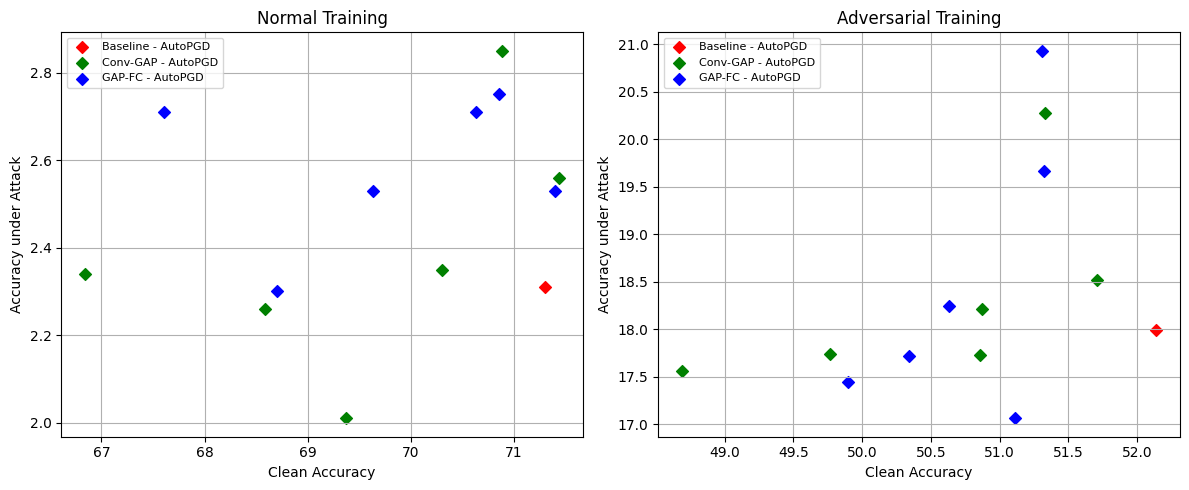

In [ ]:

plt.figure(figsize=(12, 5))

# Normal Training
plt.subplot(1, 2, 1)
for gate in gates:
    gate_df = df[df["Gate"] == gate]
#     plt.scatter(gate_df["Normal Clean"], gate_df["Normal PGD"], marker='o', color=colors[gate], label=f"{gate} - PGD")
    plt.scatter(gate_df["Normal Clean"], gate_df["Normal AutoPGD"], marker='D', color=colors[gate], label=f"{gate} - AutoPGD")
plt.xlabel("Clean Accuracy")
plt.ylabel("Accuracy under Attack")
plt.title("Normal Training")
plt.grid(True)
plt.legend(fontsize=8)

# Adversarial Training
plt.subplot(1, 2, 2)
for gate in gates:
    gate_df = df[df["Gate"] == gate]
#     plt.scatter(gate_df["Adv Clean"], gate_df["Adv PGD"], marker='o', color=colors[gate], label=f"{gate} - PGD")
    plt.scatter(gate_df["Adv Clean"], gate_df["Adv AutoPGD"], marker='D', color=colors[gate], label=f"{gate} - AutoPGD")
plt.xlabel("Clean Accuracy")
plt.ylabel("Accuracy under Attack")
plt.title("Adversarial Training")
plt.grid(True)
plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

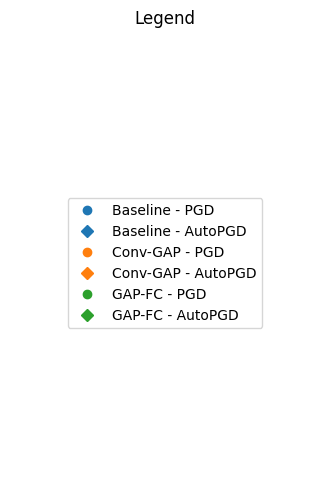

In [ ]:
import matplotlib.lines as mlines

legend_elements = []
for gate in gates:
    legend_elements.append(mlines.Line2D([], [], color=colors[gate], marker='o', linestyle='None', label=f"{gate} - PGD"))
    legend_elements.append(mlines.Line2D([], [], color=colors[gate], marker='D', linestyle='None', label=f"{gate} - AutoPGD"))

# legend
plt.figure(figsize=(4, 6))
plt.legend(handles=legend_elements, loc='center')
plt.axis('off')  
plt.title("Legend", fontsize=12)
plt.show()


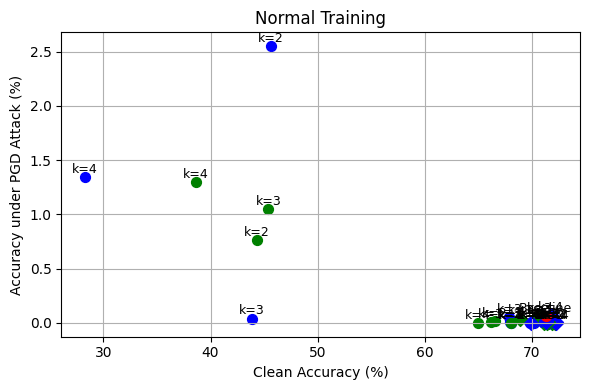

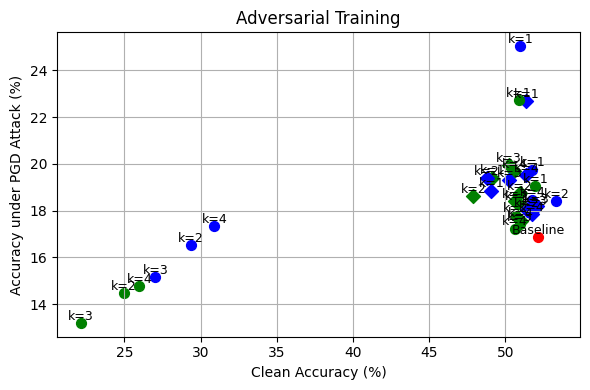

In [ ]:
# ResNet18---Tabel1
# # Robustness–Accuracy Trade-off 

# %% 
import pandas as pd
import matplotlib.pyplot as plt

# %% 
moe_data = {
    
    ("BlockMoE", "L_ent", "Conv-GAP"): {
        1: {"normal": (70.08, 0.01, 2.22), "adversarial": (51.97, 19.06, 22.11)},
        2: {"normal": (66.54, 0.02, 2.89), "adversarial": (50.69, 17.79, 19.45)},
        3: {"normal": (66.16, 0.01, 2.48), "adversarial": (50.93, 17.41, 18.99)},
        4: {"normal": (64.96, 0.00, 2.65), "adversarial": (50.63, 17.23, 18.81)},
    },
    ("BlockMoE", "L_ent", "GAP-FC"): {
        1: {"normal": (70.20, 0.00, 2.66), "adversarial": (51.76, 19.75, 22.31)},
        2: {"normal": (67.93, 0.01, 2.57), "adversarial": (53.34, 18.40, 20.38)},
        3: {"normal": (67.90, 0.05, 2.73), "adversarial": (51.89, 18.10, 19.96)},
        4: {"normal": (68.05, 0.00, 2.42), "adversarial": (51.77, 18.47, 19.20)},
    },
    ("BlockMoE", "L_switch", "Conv-GAP"): {
        1: {"normal": (70.19, 0.03, 2.51), "adversarial": (50.82, 18.33, 20.99)},
        2: {"normal": (71.94, 0.00, 2.96), "adversarial": (50.94, 18.75, 20.25)},
        3: {"normal": (71.12, 0.00, 2.23), "adversarial": (50.61, 18.42, 19.82)},
        4: {"normal": (72.16, 0.00, 2.73), "adversarial": (51.00, 17.57, 18.31)},
    },
    ("BlockMoE", "L_switch", "GAP-FC"): {
        1: {"normal": (70.86, 0.03, 2.99), "adversarial": (51.36, 22.69, 21.22)},
        2: {"normal": (72.23, 0.01, 2.34), "adversarial": (51.39, 18.03, 20.01)},
        3: {"normal": (71.64, 0.01, 2.34), "adversarial": (52.06, 18.19, 19.92)},
        4: {"normal": (72.31, 0.00, 2.56), "adversarial": (51.72, 17.85, 18.75)},
    },
    ("ConvMoE", "L_ent", "Conv-GAP"): {
        1: {"normal": (68.11, 0.00, 2.89), "adversarial": (50.87, 22.74, 22.46)},
        2: {"normal": (44.33, 0.76, 4.23), "adversarial": (24.96, 14.46, 16.13)},
        3: {"normal": (45.40, 1.05, 3.55), "adversarial": (22.14, 13.20, 15.32)},
        4: {"normal": (38.61, 1.30, 3.01), "adversarial": (25.99, 14.77, 16.85)},
    },
    ("ConvMoE", "L_ent", "GAP-FC"): {
        1: {"normal": (69.84, 0.00, 3.11), "adversarial": (50.96, 25.03, 24.03)},
        2: {"normal": (45.64, 2.55, 3.23), "adversarial": (29.36, 16.51, 18.28)},
        3: {"normal": (43.85, 0.04, 3.89), "adversarial": (27.04, 15.17, 16.89)},
        4: {"normal": (28.26, 1.34, 4.03), "adversarial": (30.88, 17.33, 19.27)},
    },
    ("ConvMoE", "L_switch", "Conv-GAP"): {
        1: {"normal": (68.93, 0.04, 3.26), "adversarial": (49.15, 19.41, 20.51)},
        2: {"normal": (71.54, 0.01, 3.45), "adversarial": (47.89, 18.61, 19.26)},
        3: {"normal": (70.72, 0.06, 2.89), "adversarial": (50.21, 19.95, 19.17)},
        4: {"normal": (71.45, 0.00, 3.88), "adversarial": (50.60, 19.70, 18.59)},
    },
    ("ConvMoE", "L_switch", "GAP-FC"): {
        1: {"normal": (69.89, 0.00, 3.28), "adversarial": (49.08, 18.85, 20.40)},
        2: {"normal": (71.32, 0.02, 3.35), "adversarial": (48.79, 19.38, 20.13)},
        3: {"normal": (71.35, 0.01, 2.59), "adversarial": (50.25, 19.29, 19.27)},
        4: {"normal": (71.80, 0.07, 3.79), "adversarial": (51.38, 19.53, 17.77)},
    },
    ("Baseline", None, "Baseline"): {
        "Baseline": {"normal": (71.30, 0.06, 2.31), "adversarial": (52.14, 16.87, 17.99)},
        },
}

# %% 
# 3. Flatten to DataFrame
data = [
    {
        "moe":     moe,
        "loss":    loss,
        "gate":    gate,
        "k":       k,
        "training":training,
        "clean":   vals[0],
        "PGD":     vals[1],
        "AutoPGD": vals[2],
    }
    for (moe, loss, gate), kmap in moe_data.items()
    for k, tmap in kmap.items()
    for training, vals in tmap.items()
]
df = pd.DataFrame(data)
df_conv = df[df['moe'].isin(['ConvMoE', 'Baseline'])]

# %% 
def plot_tradeoff(df, training_type, title,metric):
    sub = df[df['training'] == training_type]
    plt.figure(figsize=(6,4))
    for _, row in sub.iterrows():
        x, y = row['clean'], row[metric]
        color = 'red' if row['moe']=='Baseline' else ('blue' if row['gate']=='GAP-FC' else 'green')
        marker= 'o' if row['loss'] in (None, 'L_ent') else 'D'
        plt.scatter(x, y, c=color, marker=marker, s=50)
        label = 'Baseline' if row['moe']=='Baseline' else f'k={row["k"]}'
        plt.text(x+0.02, y+0.01, label, ha='center', va='bottom',fontsize=9)
    plt.title(title)
    plt.xlabel('Clean Accuracy (%)')
    plt.ylabel(f'Accuracy under {metric} Attack (%)')
    plt.grid(True)
    plt.tight_layout()

# %% 
plot_tradeoff(df, 'normal',      'Normal Training', 'PGD')
plot_tradeoff(df, 'adversarial','Adversarial Training', 'PGD')
plt.show()


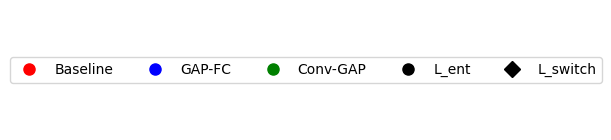

In [ ]:
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='red',   label='Baseline',  linestyle='', markersize=8),
    Line2D([0], [0], marker='o', color='blue',  label='GAP-FC',    linestyle='', markersize=8),
    Line2D([0], [0], marker='o', color='green', label='Conv-GAP',  linestyle='', markersize=8),
    Line2D([0], [0], marker='o', color='black',label='L_ent',     linestyle='', markersize=8),
    Line2D([0], [0], marker='D', color='black',label='L_switch',  linestyle='', markersize=8),
]

fig = plt.figure(figsize=(6,1.5))
fig.legend(handles=legend_elements, loc='center', ncol=5)
plt.axis('off')
plt.tight_layout()
plt.show()

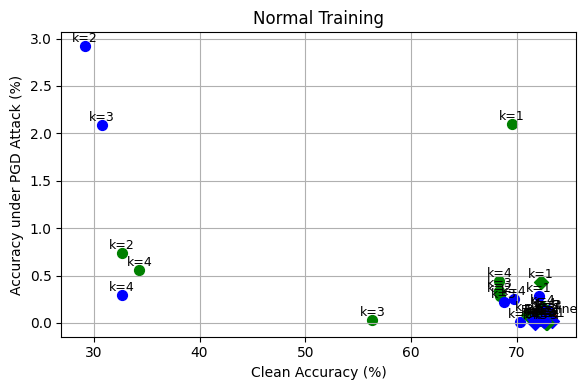

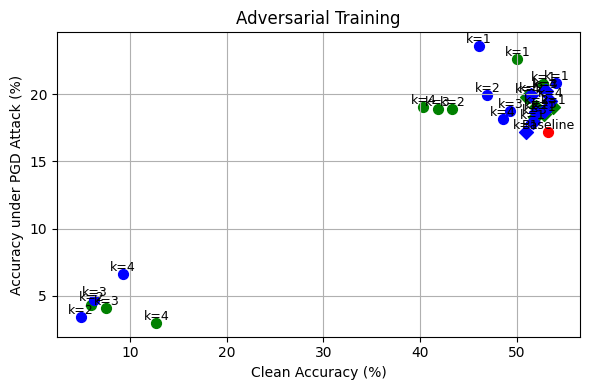

In [ ]:
moe_data_Resnet50 = {
    ("Baseline",    None,      "Baseline"): {
        "Baseline": {"normal":     (73.18, 0.06, 1.87),
               "adversarial":(53.25,17.21, 1.36)},
    },
    ("BlockMoE",   "L_ent",     "Conv-GAP"): {
        1: {"normal":     (72.29, 0.02, 2.71), "adversarial":(52.70,20.76,1.20)},
        2: {"normal":     (68.38, 0.28, 2.47), "adversarial":(43.31,18.86,0.97)},
        3: {"normal":     (68.30, 0.34, 1.83), "adversarial":(41.82,18.87,1.06)},
        4: {"normal":     (68.33, 0.44, 1.74), "adversarial":(40.32,19.03,1.15)},
    },
    ("BlockMoE",   "L_ent",     "GAP-FC"): {
        1: {"normal":     (72.09, 0.04, 3.47), "adversarial":(54.05,20.81,1.05)},
        2: {"normal":     (70.30, 0.01, 1.31), "adversarial":(46.94,19.93,1.01)},
        3: {"normal":     (68.76, 0.22, 1.57), "adversarial":(49.29,18.72,1.00)},
        4: {"normal":     (69.68, 0.25, 1.37), "adversarial":(48.52,18.12,1.00)},
    },
    ("BlockMoE",  "L_switch",   "Conv-GAP"): {
        1: {"normal":     (72.25, 0.43, 1.83), "adversarial":(53.75,19.01,1.00)},
        2: {"normal":     (72.93, 0.11, 1.34), "adversarial":(51.99,19.02,1.23)},
        3: {"normal":     (72.83, 0.11, 1.93), "adversarial":(51.85,18.27,1.43)},
        4: {"normal":     (72.44, 0.16, 1.07), "adversarial":(51.04,19.82,1.43)},
    },
    ("BlockMoE",  "L_switch",   "GAP-FC"): {
        1: {"normal":     (73.34, 0.02, 3.15), "adversarial":(50.90,17.21,1.36)},
        2: {"normal":     (72.83, 0.05, 1.63), "adversarial":(51.46,19.95,1.34)},
        3: {"normal":     (73.04, 0.11, 1.45), "adversarial":(52.99,20.26,1.35)},
        4: {"normal":     (72.53, 0.13, 1.26), "adversarial":(52.85,20.26,1.37)},
    },
    ("ConvMoE",    "L_ent",     "Conv-GAP"): {
        1: {"normal":     (69.51, 2.10, 2.04), "adversarial":(50.04,22.58,1.04)},
        2: {"normal":     (32.66, 0.74, 1.01), "adversarial":( 6.04, 4.34,0.93)},
        3: {"normal":     (56.30, 0.03, 1.04), "adversarial":( 7.57, 4.11,0.94)},
        4: {"normal":     (34.32, 0.56, 1.04), "adversarial":(12.76, 2.98,1.23)},
    },
    ("ConvMoE",    "L_ent",     "GAP-FC"): {
        1: {"normal":     (72.06, 0.28, 1.21), "adversarial":(46.03,23.57,1.00)},
        2: {"normal":     (29.15, 2.92, 1.02), "adversarial":( 4.93, 3.41,0.98)},
        3: {"normal":     (30.79, 2.09, 1.01), "adversarial":( 6.32, 4.72,1.00)},
        4: {"normal":     (32.68, 0.29, 1.04), "adversarial":( 9.28, 6.59,0.92)},
    },
    ("ConvMoE",  "L_switch",   "Conv-GAP"): {
        1: {"normal":     (71.01, 0.08, 1.52), "adversarial":(52.78,18.52,1.00)},
        2: {"normal":     (71.83, 0.05, 1.71)},  # adversarial 缺失
        3: {"normal":     (72.72, 0.00, 3.20)},
        4: {"normal":     (72.83, 0.00, 2.50)},
    },
    ("ConvMoE",  "L_switch",   "GAP-FC"): {
        1: {"normal":     (71.57, 0.04, 1.29), "adversarial":(51.63,17.90,1.00)},
        2: {"normal":     (72.48, 0.03, 2.76), "adversarial":(51.97,18.64,1.00)},
        3: {"normal":     (71.70, 0.00, 2.83), "adversarial":(52.80,18.76,1.01)},
        4: {"normal":     (72.57, 0.02, 2.24), "adversarial":(53.45,19.52,1.45)},
    },
}

data = [
    {
        "moe":     moe,
        "loss":    loss,
        "gate":    gate,
        "k":       k,
        "training":training,
        "clean":   vals[0],
        "PGD":     vals[1],
        "AutoPGD": vals[2],
    }
    for (moe, loss, gate), kmap in moe_data_Resnet50.items()
    for k, tmap in kmap.items()
    for training, vals in tmap.items()
]
df = pd.DataFrame(data)
df_conv = df[df['moe'].isin(['ConvMoE', 'Baseline'])]

# %% 
def plot_tradeoff(df, training_type, title, metric):
    sub = df[df['training'] == training_type]
    plt.figure(figsize=(6,4))
    for _, row in sub.iterrows():
        x, y = row['clean'], row[metric]
        color = 'red' if row['moe']=='Baseline' else ('blue' if row['gate']=='GAP-FC' else 'green')
        marker= 'o' if row['loss'] in (None, 'L_ent') else 'D'
        plt.scatter(x, y, c=color, marker=marker, s=50)
        label = 'Baseline' if row['moe']=='Baseline' else f'k={row["k"]}'
        plt.text(x+0.02, y+0.01, label, ha='center', va='bottom',fontsize=9)
    plt.title(title)
    plt.xlabel('Clean Accuracy (%)')
    plt.ylabel(f'Accuracy under {metric} Attack (%)')
    plt.grid(True)
    plt.tight_layout()

# %% 
plot_tradeoff(df, 'normal',      'Normal Training', 'PGD')
plot_tradeoff(df, 'adversarial','Adversarial Training', 'PGD')
plt.show()


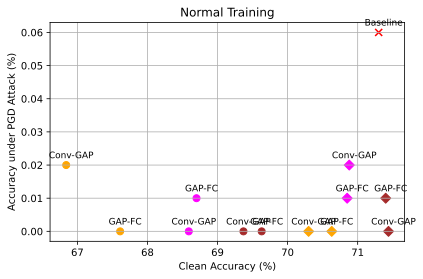

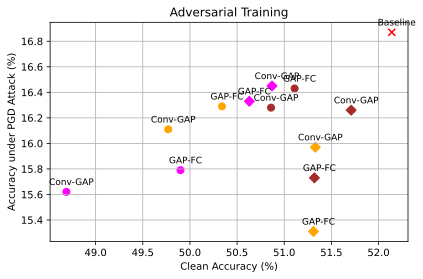

In [ ]:
# ResNet18, different MoE position, for BlockMoE
# %% 
import pandas as pd
import matplotlib.pyplot as plt

# %% 
conv4_data = {
    ("Baseline", None, "Baseline"): {
        None: {"normal": (71.30, 0.06, 2.31), "adversarial": (52.14, 16.87, 17.99)},
    },
    ("BlockMoE replacing 1st BasicBlock", "L_ent", "Conv-GAP"): {
        1: {"normal": (68.59, 0.00, 2.26), "adversarial": (48.69, 15.62, 17.99)},
    },
    ("BlockMoE replacing 1st BasicBlock", "L_ent", "GAP-FC"): {
        1: {"normal": (68.70, 0.01, 2.30), "adversarial": (49.90, 15.79, 17.44)},
    },
    ("BlockMoE replacing 1st BasicBlock", "L_switch", "Conv-GAP"): {
        1: {"normal": (70.88, 0.02, 2.85), "adversarial": (50.87, 16.45, 18.21)},
    },
    ("BlockMoE replacing 1st BasicBlock", "L_switch", "GAP-FC"): {
        1: {"normal": (70.85, 0.01, 2.75), "adversarial": (50.63, 16.33, 18.24)},
    },
    ("BlockMoE replacing 2nd BasicBlock", "L_ent", "Conv-GAP"): {
        1: {"normal": (69.37, 0.00, 2.01), "adversarial": (50.86, 16.28, 17.73)},
    },
    ("BlockMoE replacing 2nd BasicBlock", "L_ent", "GAP-FC"): {
        1: {"normal": (69.63, 0.00, 2.53), "adversarial": (51.11, 16.43, 17.06)},
    },
    ("BlockMoE replacing 2nd BasicBlock", "L_switch", "Conv-GAP"): {
        1: {"normal": (71.44, 0.00, 2.56), "adversarial": (51.71, 16.26, 18.52)},
    },
    ("BlockMoE replacing 2nd BasicBlock", "L_switch", "GAP-FC"): {
        1: {"normal": (71.40, 0.01, 2.53), "adversarial": (51.32, 15.73, 19.66)},
    },
    ("2 BlockMoEs", "L_ent", "Conv-GAP"): {
        1: {"normal": (66.84, 0.02, 2.34), "adversarial": (49.77, 16.11, 17.74)},
    },
    ("2 BlockMoEs", "L_ent", "GAP-FC"): {
        1: {"normal": (67.61, 0.00, 2.71), "adversarial": (50.34, 16.29, 17.72)},
    },
    ("2 BlockMoEs", "L_switch", "Conv-GAP"): {
        1: {"normal": (70.30, 0.00, 2.35), "adversarial": (51.33, 15.97, 20.27)},
    },
    ("2 BlockMoEs", "L_switch", "GAP-FC"): {
        1: {"normal": (70.63, 0.00, 2.71), "adversarial": (51.31, 15.31, 20.93)},
    },
}

conv5_data = {
    ("Baseline", None, "Baseline"): {
        None: {
            "normal":     (71.30, 0.06, 2.31),
            "adversarial":(52.14,16.87,17.99),
        },
    },
    ("BlockMoE replacing 1st BasicBlock", "L_ent",    "Conv-GAP"): {
        1: {
            "normal":     (69.11, 0.00, 2.63),
            "adversarial":(52.14,17.45,18.22),
        },
    },
    ("BlockMoE replacing 1st BasicBlock", "L_ent",    "GAP-FC"): {
        1: {
            "normal":     (70.07, 0.01, 2.55),
            "adversarial":(52.00,17.52,19.85),
        },
    },
    ("BlockMoE replacing 1st BasicBlock", "L_switch", "Conv-GAP"): {
        1: {
            "normal":     (71.39, 0.01, 2.74),
            "adversarial":(52.89,16.35,20.01),
        },
    },
    ("BlockMoE replacing 1st BasicBlock", "L_switch", "GAP-FC"): {
        1: {
            "normal":     (70.98, 0.01, 2.59),
            "adversarial":(52.57,16.43,22.00),
        },
    },
    ("BlockMoE replacing 2nd BasicBlock", "L_ent",    "Conv-GAP"): {
        1: {
            "normal":     (69.39, 0.00, 2.49),
            "adversarial":(53.04,18.92,20.61),
        },
    },
    ("BlockMoE replacing 2nd BasicBlock", "L_ent",    "GAP-FC"): {
        1: {
            "normal":     (70.27, 0.00, 2.42),
            "adversarial":(54.91,19.96,20.76),
        },
    },
    ("BlockMoE replacing 2nd BasicBlock", "L_switch", "Conv-GAP"): {
        1: {
            "normal":     (71.60, 0.00, 3.21),
            "adversarial":(54.04,19.30,19.73),
        },
    },
    ("BlockMoE replacing 2nd BasicBlock", "L_switch", "GAP-FC"): {
        1: {
            "normal":     (71.05, 0.00, 2.70),
            "adversarial":(52.15,18.58,20.29),
        },
    },
    # 2 BlockMoEs（conv5_x）
    ("2 BlockMoEs", "L_ent",    "Conv-GAP"): {
        1: {
            "normal":     (70.08, 0.01, 2.22),
            "adversarial":(51.97,19.06,22.11),
        },
    },
    ("2 BlockMoEs", "L_ent",    "GAP-FC"): {
        1: {
            "normal":     (70.20, 0.00, 2.66),
            "adversarial":(51.76,19.75,22.31),
        },
    },
    ("2 BlockMoEs", "L_switch", "Conv-GAP"): {
        1: {
            "normal":     (70.19, 0.03, 2.51),
            "adversarial":(50.82,18.33,20.99),
        },
    },
    ("2 BlockMoEs", "L_switch", "GAP-FC"): {
        1: {
            "normal":     (70.86, 0.03, 2.99),
            "adversarial":(51.36,22.69,21.22),
        },
    },
}

# %% 
data = [
    {
        "moe": moe,
        "loss": loss,
        "gate": gate,
        "k": k,
        "training": training,
        "clean": vals[0],
        "PGD":     vals[1],
        "AutoPGD": vals[2],
    }
    for (moe, loss, gate), kmap in conv4_data.items()
    for k, tmap in kmap.items()
    for training, vals in tmap.items()
]
df = pd.DataFrame(data)

# %% 
models = [
    "Baseline",
    "BlockMoE replacing 1st BasicBlock",
    "BlockMoE replacing 2nd BasicBlock",
    "2 BlockMoEs",
]
df_plot = df[df['moe'].isin(models)]

# %% 
def plot_tradeoff(df, training_type, title, metric):
    plt.figure(figsize=(6,4))
    color_map = {
        "Baseline": "red",
        "BlockMoE replacing 1st BasicBlock": "magenta",
        "BlockMoE replacing 2nd BasicBlock": "brown",
        "2 BlockMoEs": "orange",
    }
    marker_map = {"L_ent": "o", "L_switch": "D", None: "x"}
    sub = df[df['training'] == training_type]
    for _, row in sub.iterrows():
        x, y = row['clean'], row[metric]
        c = color_map[row["moe"]]
        m = marker_map.get(row["loss"], "o")
        plt.scatter(x, y, c=c, marker=m, s=50)
        
        plt.annotate(row["gate"], (x, y), textcoords="offset points", xytext=(5, 5), ha='center', va='bottom', fontsize=9)
    plt.title(title)
    plt.xlabel("Clean Accuracy (%)")
    plt.ylabel(f'Accuracy under {metric} Attack (%)')
    plt.grid(True)
    plt.tight_layout()

# %% 
attack = 'PGD'
plot_tradeoff(df_plot, 'normal',      'Normal Training', attack)
plt.savefig(f'Stage4_Normal_Training_{attack}.pdf', format="pdf", bbox_inches="tight")
plot_tradeoff(df_plot, 'adversarial','Adversarial Training', attack)
plt.savefig(f'Stage4_Adversarial_Training_{attack}.pdf', format="pdf", bbox_inches="tight")
plt.show()


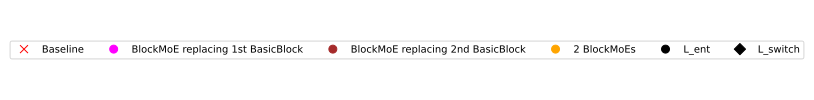

In [144]:
legend_elements = [
    Line2D([0], [0], marker='x', color='red',    label='Baseline',                         linestyle='', markersize=8),
    Line2D([0], [0], marker='o', color='magenta',   label='BlockMoE replacing 1st BasicBlock', linestyle='', markersize=8),
    Line2D([0], [0], marker='o', color='brown',  label='BlockMoE replacing 2nd BasicBlock', linestyle='', markersize=8),
    Line2D([0], [0], marker='o', color='orange', label='2 BlockMoEs',                        linestyle='', markersize=8),
    Line2D([0], [0], marker='o', color='black',  label='L_ent',                              linestyle='', markersize=8),
    Line2D([0], [0], marker='D', color='black',  label='L_switch',                           linestyle='', markersize=8),
]

fig = plt.figure(figsize=(6,1.5))
fig.legend(handles=legend_elements, loc='center', ncol=6)
fig.patch.set_visible(False)
plt.axis('off')
plt.tight_layout()
plt.savefig("BlockMoE_legend.pdf", format="pdf", bbox_inches="tight")
plt.show()

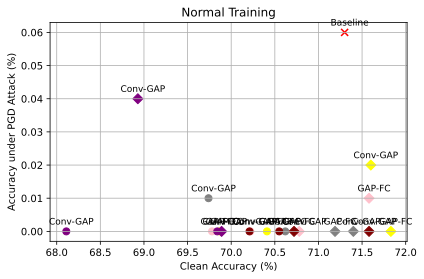

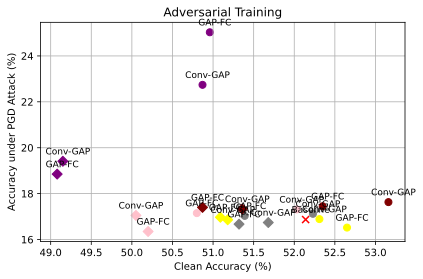

In [ ]:
# ResNet18, different MoE position, for ConvMoE
# %% 
import pandas as pd
import matplotlib.pyplot as plt

# %% 
# for stage 5
ConvMoE_data = {
    ("Baseline", None, "Baseline"): {
        None: {"normal": (71.30, 0.06, 2.31), "adversarial": (52.14, 16.87, 17.99)},
    },
    ("ConvMoE replacing 1st conv layer", "L_ent",    "Conv-GAP"): {
        1: {"normal":     (69.74, 0.01, 2.22),
            "adversarial":(52.23,17.12,18.57)},
    },
    ("ConvMoE replacing 1st conv layer", "L_ent",    "GAP-FC"): {
        1: {"normal":     (70.62, 0.00, 2.03),
            "adversarial":(51.39,17.03,18.25)},
    },
    ("ConvMoE replacing 1st conv layer", "L_switch", "Conv-GAP"): {
        1: {"normal":     (71.40, 0.00, 2.09),
            "adversarial":(51.68,16.74,19.19)},
    },
    ("ConvMoE replacing 1st conv layer", "L_switch", "GAP-FC"): {
        1: {"normal":     (71.19, 0.00, 2.18),
            "adversarial":(51.32,16.67,18.64)},
    },
    ("ConvMoE replacing 2nd conv layer", "L_ent",    "Conv-GAP"): {
        1: {"normal":     (69.87, 0.00, 2.16),
            "adversarial":(52.31,16.89,18.16)},
    },
    ("ConvMoE replacing 2nd conv layer", "L_ent",    "GAP-FC"): {
        1: {"normal":     (70.41, 0.00, 2.14),
            "adversarial":(52.65,16.52,18.39)},
    },
    ("ConvMoE replacing 2nd conv layer", "L_switch", "Conv-GAP"): {
        1: {"normal":     (71.60, 0.02, 2.12),
            "adversarial":(51.18,16.86,19.05)},
    },
    ("ConvMoE replacing 2nd conv layer", "L_switch", "GAP-FC"): {
        1: {"normal":     (71.83, 0.00, 2.19),
            "adversarial":(51.09,16.97,18.87)},
    },

    ("ConvMoE replacing 3rd conv layer", "L_ent",    "Conv-GAP"): {
        1: {"normal":     (70.22, 0.00, 2.49),
            "adversarial":(52.03,17.31,18.83)},
    },
    ("ConvMoE replacing 3rd conv layer", "L_ent",    "GAP-FC"): {
        1: {"normal":     (69.78, 0.00, 2.22),
            "adversarial":(50.80,17.15,18.52)},
    },
    ("ConvMoE replacing 3rd conv layer", "L_switch", "Conv-GAP"): {
        1: {"normal":     (70.78, 0.00, 2.36),
            "adversarial":(50.05,17.05,19.53)},
    },
    ("ConvMoE replacing 3rd conv layer", "L_switch", "GAP-FC"): {
        1: {"normal":     (71.58, 0.01, 2.32),
            "adversarial":(50.20,16.35,20.65)},
    },

    ("ConvMoE replacing 4th conv layer", "L_ent",    "Conv-GAP"): {
        1: {"normal":     (70.21, 0.00, 2.54),
            "adversarial":(53.16,17.63,18.80)},
    },
    ("ConvMoE replacing 4th conv layer", "L_ent",    "GAP-FC"): {
        1: {"normal":     (70.55, 0.00, 2.38),
            "adversarial":(52.35,17.45,18.56)},
    },
    ("ConvMoE replacing 4th conv layer", "L_switch", "Conv-GAP"): {
        1: {"normal":     (71.58, 0.00, 2.36),
            "adversarial":(51.36,17.33,19.36)},
    },
    ("ConvMoE replacing 4th conv layer", "L_switch", "GAP-FC"): {
        1: {"normal":     (70.72, 0.00, 2.52),
            "adversarial":(50.87,17.40,18.90)},
    },

    ("ConvMoEs replacing all 4 conv layers", "L_ent",    "Conv-GAP"): {
        1: {"normal":     (68.11, 0.00, 2.89),
            "adversarial":(50.87,22.74,22.46)},
    },
    ("ConvMoEs replacing all 4 conv layers", "L_ent",    "GAP-FC"): {
        1: {"normal":     (69.84, 0.00, 3.11),
            "adversarial":(50.96,25.03,24.03)},
    },
    ("ConvMoEs replacing all 4 conv layers", "L_switch", "Conv-GAP"): {
        1: {"normal":     (68.93, 0.04, 3.26),
            "adversarial":(49.15,19.41,20.51)},
    },
    ("ConvMoEs replacing all 4 conv layers", "L_switch", "GAP-FC"): {
        1: {"normal":     (69.89, 0.00, 3.28),
            "adversarial":(49.08,18.85,20.40)},
    },
}

# %% 
data = [
    {
        "moe": moe,
        "loss": loss,
        "gate": gate,
        "k": k,
        "training": training,
        "clean": vals[0],
        "PGD":     vals[1],
        "AutoPGD": vals[2],
    }
    for (moe, loss, gate), kmap in ConvMoE_data.items()
    for k, tmap in kmap.items()
    for training, vals in tmap.items()
]
df = pd.DataFrame(data)

# %% 
models = [
    "Baseline",
    "ConvMoE replacing 1st conv layer",
    "ConvMoE replacing 2nd conv layer",
    "ConvMoE replacing 3rd conv layer",
    "ConvMoE replacing 4th conv layer",
    "ConvMoEs replacing all 4 conv layers",
]
df_plot = df[df['moe'].isin(models)]

# %% 
def plot_tradeoff(df, training_type, title, metric):
    plt.figure(figsize=(6,4))
    color_map = {
        "Baseline": "red",
        "ConvMoE replacing 1st conv layer": "gray",
        "ConvMoE replacing 2nd conv layer": "yellow",
        "ConvMoE replacing 3rd conv layer": "pink",
        "ConvMoE replacing 4th conv layer": "maroon",
        "ConvMoEs replacing all 4 conv layers": "purple",
    }
    marker_map = {"L_ent": "o", "L_switch": "D", None: "x"}
    sub = df[df['training'] == training_type]
    for _, row in sub.iterrows():
        x, y = row['clean'], row[metric]
        c = color_map[row["moe"]]
        m = marker_map.get(row["loss"], "o")
        plt.scatter(x, y, c=c, marker=m, s=50)
        plt.annotate(row["gate"], (x, y), textcoords="offset points", xytext=(5, 5), ha='center', va='bottom', fontsize=9)
    plt.title(title)
    plt.xlabel("Clean Accuracy (%)")
    plt.ylabel(f'Accuracy under {metric} Attack (%)')
    plt.grid(True)
    plt.tight_layout()

# %% 
attack = 'PGD'
plot_tradeoff(df_plot, 'normal',      'Normal Training', attack)
plt.savefig(f'ConvMoE_Normal_Training_{attack}.pdf', format="pdf", bbox_inches="tight")
plot_tradeoff(df_plot, 'adversarial','Adversarial Training', attack)
plt.savefig(f'ConvMoE_Adversarial_Training_{attack}.pdf', format="pdf", bbox_inches="tight")
plt.show()


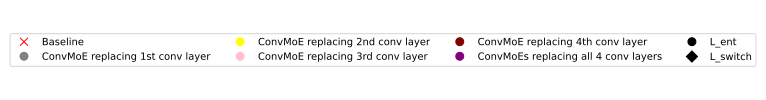

In [ ]:
legend_elements = [
    Line2D([0], [0], marker='x', color='red',     label='Baseline',                             linestyle='', markersize=8),
    Line2D([0], [0], marker='o', color='gray',  label='ConvMoE replacing 1st conv layer',      linestyle='', markersize=8),
    Line2D([0], [0], marker='o', color='yellow',  label='ConvMoE replacing 2nd conv layer',      linestyle='', markersize=8),
    Line2D([0], [0], marker='o', color='pink',    label='ConvMoE replacing 3rd conv layer',      linestyle='', markersize=8),
    Line2D([0], [0], marker='o', color='maroon',  label='ConvMoE replacing 4th conv layer',      linestyle='', markersize=8),
    Line2D([0], [0], marker='o', color='purple',    label='ConvMoEs replacing all 4 conv layers',  linestyle='', markersize=8),
    Line2D([0], [0], marker='o', color='black',   label='L_ent',                                 linestyle='', markersize=8),
    Line2D([0], [0], marker='D', color='black',   label='L_switch',                              linestyle='', markersize=8),
]

fig = plt.figure(figsize=(8, 1.5))
fig.legend(handles=legend_elements, loc='center', ncol=4)
fig.patch.set_visible(False)
plt.axis('off')
plt.tight_layout()
plt.savefig("ConvMoE_legend.pdf", format="pdf", bbox_inches="tight")
plt.show()